In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

!pip install category_encoders
from category_encoders.leave_one_out import LeaveOneOutEncoder

from graphviz import Source

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc, fbeta_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import PolynomialFeatures

In [2]:
%matplotlib inline
sns.set_theme()

# Зафиксируем random_state
random_state = 2024

beta = 2

pd.set_option('display.max_columns', None)

In [3]:
# https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
original_df = pd.read_csv('weatherAUS.csv')

In [4]:
original_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
original_df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,141232,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,10838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,NaN,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,NaN,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,NaN,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,NaN,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [6]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
original_df.isna().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


Преобразуем дату в номер дня в году. В контексте погоды или климата эта важная информация

In [8]:
df = original_df.copy()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].dt.dayofyear

Преобразуем переменные RainToday и RainTomorrow, используя OneHotencoder.
Эти переменные будут целевыми. Решим сначала задачу предсказания дождя завтра, потом попробуем предсказать дождь сегодня

In [9]:
df = pd.get_dummies(df, columns=["RainToday"], prefix="RainToday", dtype='int', drop_first=True)
df = pd.get_dummies(df, columns=["RainTomorrow"], prefix="RainTomorrow", dtype='int', drop_first=True)

Мы хотим решить несколько задач, поэтому сохраним оригнальный датасет, а первичные преобразования положим в функцию.
Пригодится, когда будем удалять данные, где целевые переменные будут NaN. Потом их нужно будет закодировать без Nan'ов

In [10]:
def fetch_df(orig_df):
  df = orig_df.copy()
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
  df['Date'] = df['Date'].dt.dayofyear
  if (df.get("RainToday") is not None):
    df = pd.get_dummies(df, columns=["RainToday"], prefix="RainToday", dtype='int', drop_first=True)
  if (df.get("RainTomorrow") is not None):
    df = pd.get_dummies(df, columns=["RainTomorrow"], prefix="RainTomorrow", dtype='int', drop_first=True)
  return df

#Задача 1. Предсказываем будет ли завтра дождь. Целевая переменная - RainTomorrow

Будем смотреть на следующие метрики:
- f1 с коэффициентом beta > 1 - чтобы больше учитывать recall: важно не пропускать дни с дождем, поэтому стоит сосредоточиться на полноте (основная метрика)
- roc auc

In [56]:
df = original_df.copy()

Удалим строки, где целевая переменная NaN.

In [57]:
size_before = df.shape[0]
df = df.dropna(subset = ['RainTomorrow'])
size_after = df.shape[0]
print(f"Удалили {(size_before - size_after) / size_before * 100:.2f}% данных")

Удалили 2.25% данных


In [58]:
df = fetch_df(df)

Посмотрим, как распределена целевая переменная

<Axes: ylabel='Frequency'>

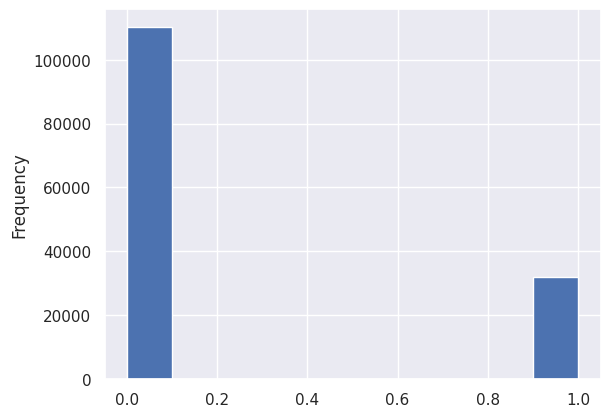

In [96]:
df['RainTomorrow_Yes'].plot.hist()

Произведем разбиение со стратификацией

In [62]:
X, y = df.drop(columns='RainTomorrow_Yes'), df['RainTomorrow_Yes']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

Проверим, что данные разбились равномерно

In [22]:
def fold_visualizer(y_train, y_test, bins=10):
    fig, ax = plt.subplots()
    sns.histplot(
        data=y_train,
        kde=True,
        stat="density",
        alpha=0.15,
        label="Train Target",
        bins=bins,
        line_kws={"linewidth":4},
    )
    sns.histplot(
        data=y_test,
        kde=True,
        stat="density",
        color="darkorange",
        alpha=0.15,
        label="Test Target",
        bins=bins,
        line_kws={"linewidth":4},
    )
    ax.legend()
    plt.show()

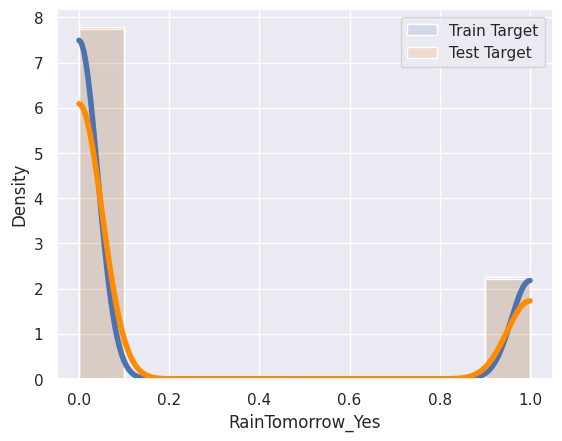

In [100]:
fold_visualizer(y_train, y_test)

In [64]:
num_cols = X_train.select_dtypes(exclude='object').columns
num_cols

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday_Yes'],
      dtype='object')

In [65]:
num_cols_with_outliers = pd.Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed9am', \
                                   'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm'])
num_cols_with_outliers

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm'],
      dtype='object')

In [66]:
num_cols_with_normal = num_cols.difference(num_cols_with_outliers)
num_cols_with_normal

Index(['Date', 'MaxTemp', 'MinTemp', 'Pressure3pm', 'Pressure9am',
       'RainToday_Yes', 'Temp3pm', 'Temp9am', 'WindGustSpeed'],
      dtype='object')

In [67]:
cat_cols = X_train.select_dtypes(include='object').columns
cat_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [68]:
cat_cols_without_location = cat_cols.difference( pd.Index(['Location']))
cat_cols_without_location

Index(['WindDir3pm', 'WindDir9am', 'WindGustDir'], dtype='object')

## Константное предсказание (DummyClassifier)

In [106]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train);

In [107]:
# Взглянем на все метрики
y_dummy_clf = dummy_clf.predict(X_test)
print(classification_report(y_test, y_dummy_clf))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     27693
           1       0.00      0.00      0.00      7856

    accuracy                           0.78     35549
   macro avg       0.39      0.50      0.44     35549
weighted avg       0.61      0.78      0.68     35549



In [21]:
def plot_roc_auc(fpr, tpr, thresholds, title):
  plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
  plt.plot(fpr, tpr, marker='.', label=title )
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.grid()
  plt.show()

In [109]:
metric_result = {}

F1-score for Dummy Classificator (recall bias): 0.0
AUC Dummy Classificator: 0.5


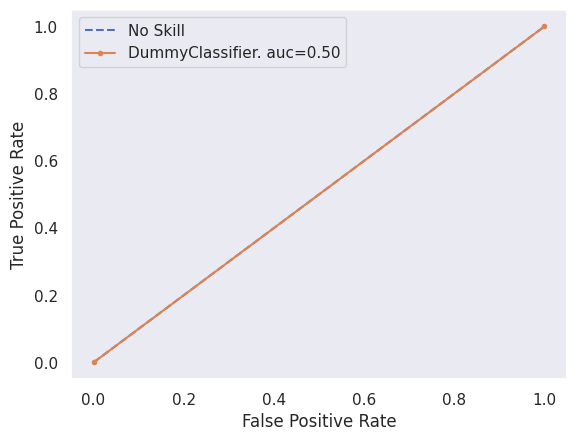

In [110]:
# Посчитаем основные метрики и сохраним для сравнения
fbeta = fbeta_score(y_test, y_dummy_clf, beta=beta)

y_pred = dummy_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f'F1-score for Dummy Classificator (recall bias): {fbeta}')
print(f'AUC Dummy Classificator: {roc_auc}')
plot_roc_auc(fpr, tpr, thresholds, title=f'DummyClassifier. auc={roc_auc:.2f}')

metric_result['DummyClassifier'] = {'fbeta': fbeta, 'auc': roc_auc}

##Логистическая регрессия

Для логистической регрессии произведем следующие преобразования:
- не можем удалить строки, где строки, так как потеряем большой процент данных
- заполним пропуски категориальных признаков новой категорией, будет шум, но не будет смещения
- будем кодировать с помощью OneHotEncoder: это не порядковые данные, классов в каждом признаке < 15, логистическая регрессия хорошо обрабатывает такой способ кодирования, в отличие от деревянных моделей. Также исключим один класс для избежания мультколлениарности
- локации придется закодировать с помощью LeaveOneOutEncoder, их больше 15
- заполним пропуски числовых признаков медианой
- для числовых признаков, которые распределены нормально применим StandardScaler
- для признаков, в которых присутсвует много выбросов, воспользуемся RobustScaler

In [111]:
categorical_preprocessing = Pipeline([
    ('Imputation', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('TargetEncoding', OneHotEncoder(drop='first')),
])

categorical_preprocessing_location = Pipeline([
    ('Imputation', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('TargetEncoding', LeaveOneOutEncoder()),
])

normal_numeric_preprocessing = Pipeline([
     ('Imputation', SimpleImputer(strategy='mean')),
     ('Scaling', StandardScaler())
])

outliers_numeric_preprocessing = Pipeline([
     ('Imputation', SimpleImputer(strategy='mean')),
     ('Scaling', RobustScaler())
])

preprocessing = make_column_transformer(
     (normal_numeric_preprocessing, num_cols_with_normal),
     (outliers_numeric_preprocessing, num_cols_with_outliers),
     (categorical_preprocessing, cat_cols_without_location),
     (categorical_preprocessing_location, pd.Index(['Location']))
)

###Логистическая регрессия без регуляризации

In [112]:
pipeline_logreg = Pipeline([
      ('Preprocessing', preprocessing),
      ("model", LogisticRegression(penalty=None))
])

In [113]:
%%time

pipeline_logreg.fit(X_train, y_train)

CPU times: user 4.31 s, sys: 1.02 s, total: 5.33 s
Wall time: 6.5 s


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['Date', 'MaxTemp', 'MinTemp', 'Pressure3pm', 'Pressure9am',
       'RainToday_Yes', 'Temp3pm', 'Temp9am', 'WindGustSpeed'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),...
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['WindDir3pm', 'WindDir9am', 'WindGustDir'], dtype='object')),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   LeaveOneOutEncoder())]),
                                                  Index(['Location'], dtype='object'))])),
                ('model', LogisticRegression(penalty=None))])

In [114]:
# Взглянем на все метрики
y_preds_logreg = pipeline_logreg.predict(X_test)
print(classification_report(y_test, y_preds_logreg))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     27693
           1       0.72      0.50      0.59      7856

    accuracy                           0.85     35549
   macro avg       0.79      0.72      0.75     35549
weighted avg       0.84      0.85      0.84     35549



F1-score for Logistic regression without reg (recall bias): 0.5349554767640133
AUC Logistic regression without reg: 0.867849397338273


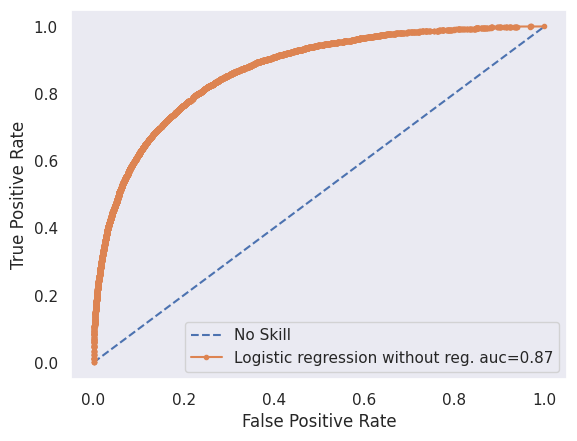

In [115]:
# Посчитаем основные метрики и сохраним для сравнения
fbeta = fbeta_score(y_test, y_preds_logreg, beta=beta)

y_pred = pipeline_logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f'F1-score for Logistic regression without reg (recall bias): {fbeta}')
print(f'AUC Logistic regression without reg: {roc_auc}')
plot_roc_auc(fpr, tpr, thresholds, title=f'Logistic regression without reg. auc={roc_auc:.2f}')

metric_result['Logistic regression without reg'] = {'fbeta': fbeta, 'auc': roc_auc}

Интерпретация весов

In [57]:
def plotCoefficients(model, columns):
    coefs = pd.DataFrame(model.coef_.ravel(), columns=["coef"], index=columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')

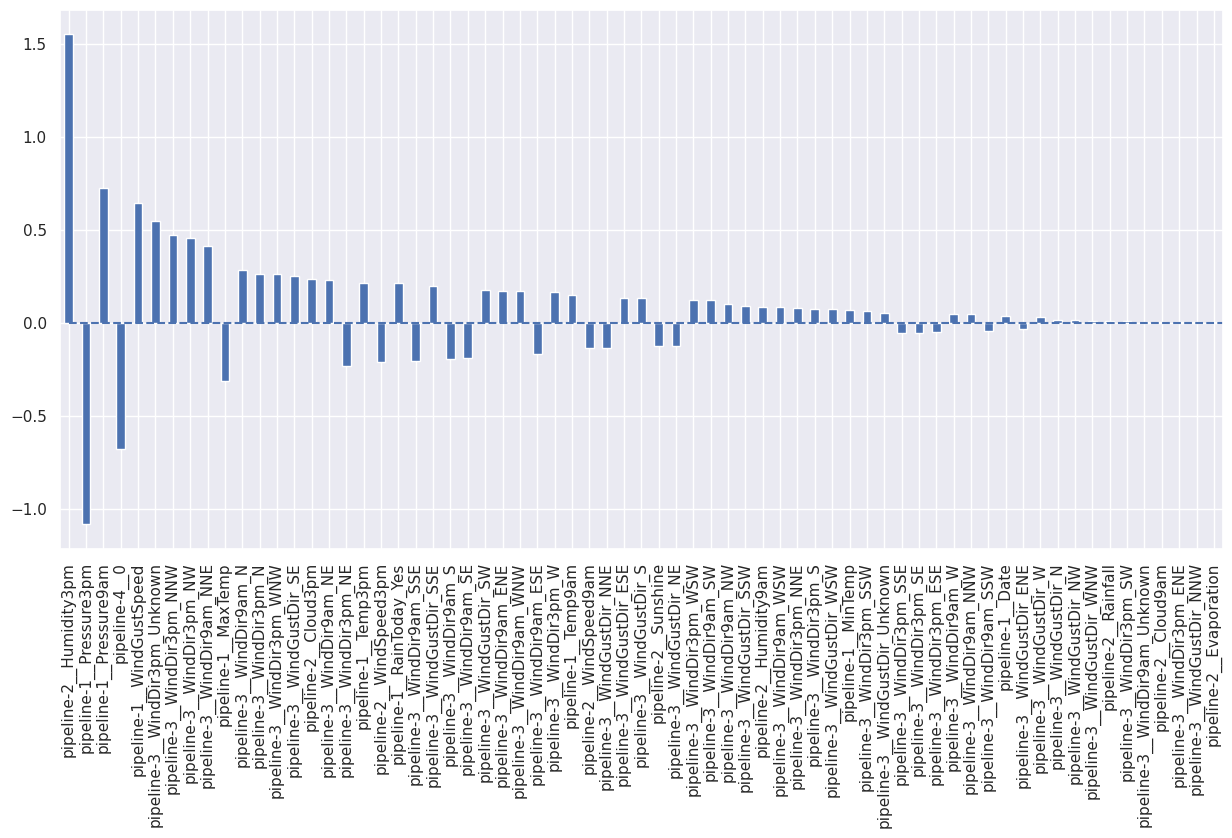

In [117]:
plotCoefficients(pipeline_logreg['model'], pipeline_logreg['Preprocessing'].get_feature_names_out())

###Логистическая регрессия с L2-регуляризацией

In [118]:
pipeline_logreg_l2 = Pipeline([
      ('Preprocessing', preprocessing),
      ("model", LogisticRegression())
])

In [119]:
%%time

# l2 по умолчанию
pipeline_logreg_l2.fit(X_train, y_train)

CPU times: user 4.43 s, sys: 885 ms, total: 5.31 s
Wall time: 9.57 s


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['Date', 'MaxTemp', 'MinTemp', 'Pressure3pm', 'Pressure9am',
       'RainToday_Yes', 'Temp3pm', 'Temp9am', 'WindGustSpeed'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),...
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['WindDir3pm', 'WindDir9am', 'WindGustDir'], dtype='object')),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   LeaveOneOutEncoder())]),
                                                  Index(['Location'], dtype='object'))])),
                ('model', LogisticRegression())])

In [120]:
y_preds_logreg_l2 = pipeline_logreg_l2.predict(X_test)
print(classification_report(y_test, y_preds_logreg_l2))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     27693
           1       0.72      0.50      0.59      7856

    accuracy                           0.85     35549
   macro avg       0.79      0.72      0.75     35549
weighted avg       0.84      0.85      0.84     35549



F1-score for Logistic regression L2 (recall bias): 0.5348346235045742
AUC Logistic regression L2: 0.8679091152388536


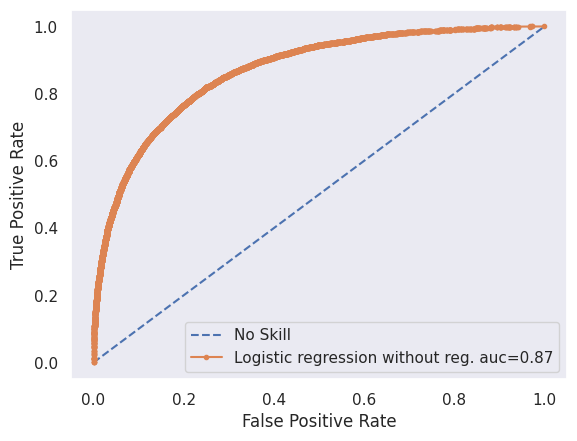

In [121]:
# Посчитаем основные метрики и сохраним для сравнения
fbeta = fbeta_score(y_test, y_preds_logreg_l2, beta=beta)

y_pred = pipeline_logreg_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f'F1-score for Logistic regression L2 (recall bias): {fbeta}')
print(f'AUC Logistic regression L2: {roc_auc}')
plot_roc_auc(fpr, tpr, thresholds, title=f'Logistic regression without reg. auc={roc_auc:.2f}')

metric_result['Logistic regression L2'] = {'fbeta': fbeta, 'auc': roc_auc}

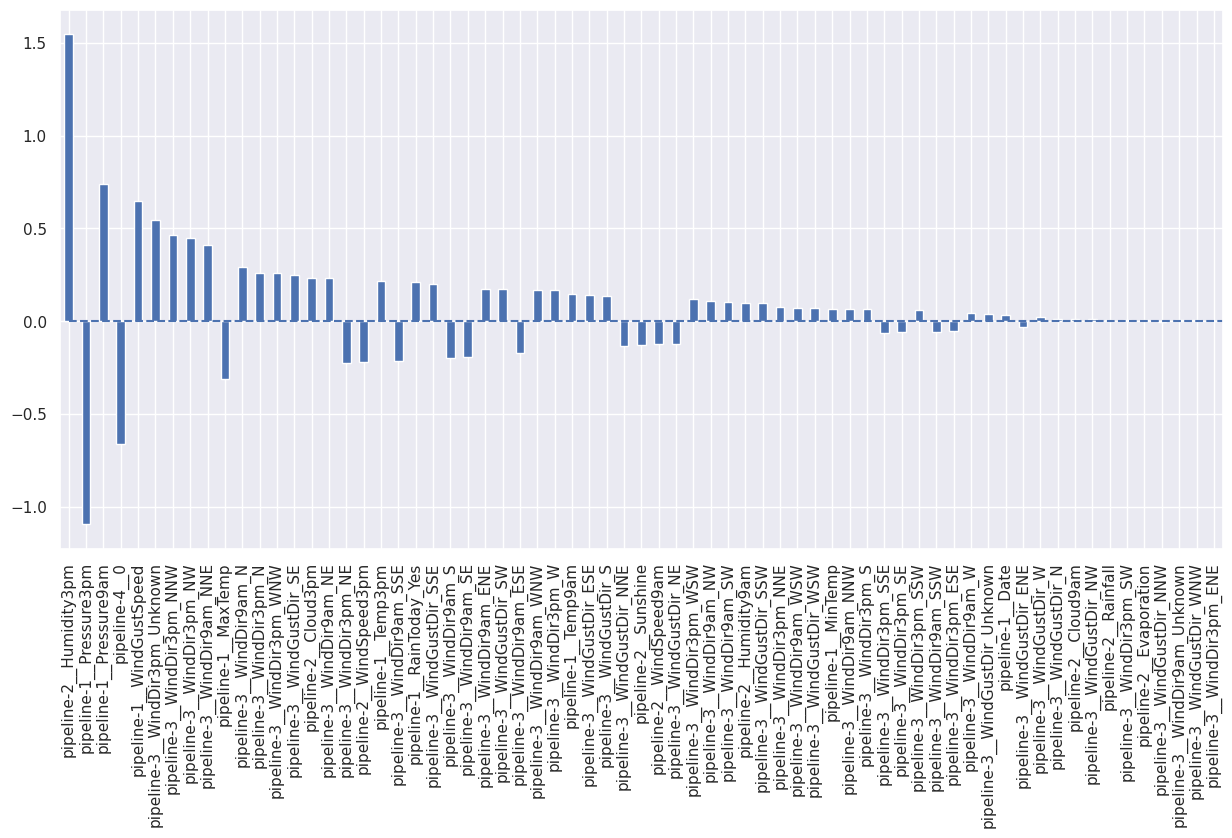

In [122]:
plotCoefficients(pipeline_logreg_l2['model'], pipeline_logreg_l2['Preprocessing'].get_feature_names_out())

###Логистическая регрессия с L1-регуляризацией

In [123]:
pipeline_logreg_l1 = Pipeline([
      ('Preprocessing', preprocessing),
      ("model", LogisticRegression(penalty='l1', solver='liblinear'))
])

In [124]:
%%time

pipeline_logreg_l1.fit(X_train, y_train)

CPU times: user 5.39 s, sys: 148 ms, total: 5.54 s
Wall time: 13.5 s


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['Date', 'MaxTemp', 'MinTemp', 'Pressure3pm', 'Pressure9am',
       'RainToday_Yes', 'Temp3pm', 'Temp9am', 'WindGustSpeed'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),...
                                                                  ('TargetEncoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['WindDir3pm', 'WindDir9am', 'WindGustDir'], dtype='object')),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   LeaveOneOutEncoder())]),
                                                  Index(['Location'], dtype='object'))])),
                ('model',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [125]:
y_preds_logreg_l1 = pipeline_logreg_l1.predict(X_test)
print(classification_report(y_test, y_preds_logreg_l1))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     27693
           1       0.72      0.50      0.59      7856

    accuracy                           0.85     35549
   macro avg       0.79      0.72      0.75     35549
weighted avg       0.84      0.85      0.84     35549



F1-score for Logistic regression L1 (recall bias): 0.5341093665403357
AUC Logistic regression L1: 0.8679070422113626


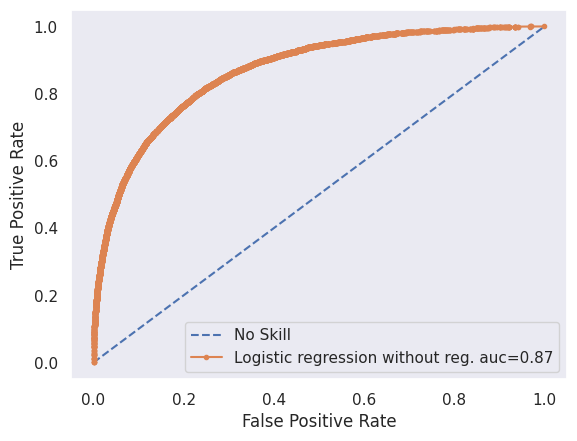

In [126]:
# Посчитаем основные метрики и сохраним для сравнения
fbeta = fbeta_score(y_test, y_preds_logreg_l1, beta=beta)

y_pred = pipeline_logreg_l1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f'F1-score for Logistic regression L1 (recall bias): {fbeta}')
print(f'AUC Logistic regression L1: {roc_auc}')
plot_roc_auc(fpr, tpr, thresholds, title=f'Logistic regression without reg. auc={roc_auc:.2f}')

metric_result['Logistic regression L1'] = {'fbeta': fbeta, 'auc': roc_auc}

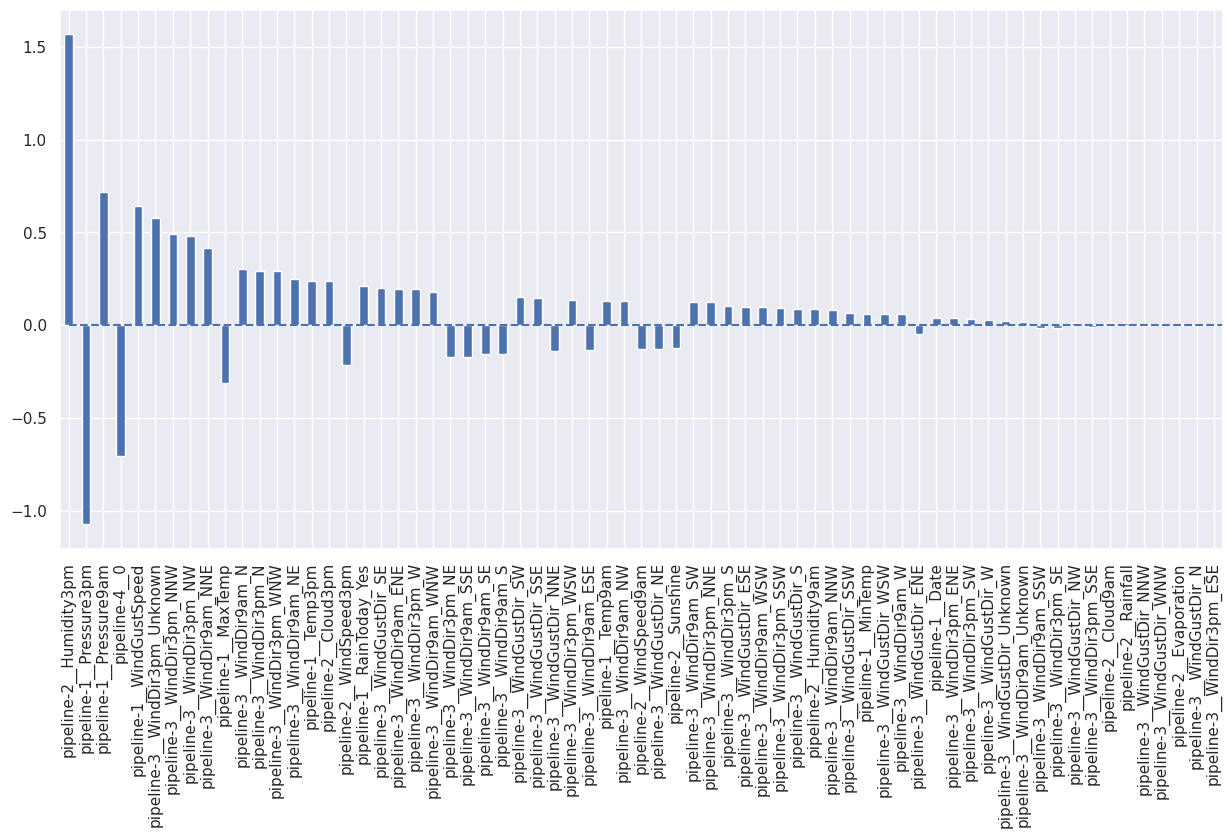

In [127]:
plotCoefficients(pipeline_logreg_l1['model'], pipeline_logreg_l1['Preprocessing'].get_feature_names_out())

### Логистическая регрессия. Полиномизация

In [128]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

pipeline_logreg_poly = Pipeline([
      ('Preprocessing', preprocessing),
      ("polynomial_features", polynomial_features),
      ("model", LogisticRegression())
])

In [129]:
%%time

pipeline_logreg_poly.fit(X_train, y_train)

CPU times: user 1min 13s, sys: 3.93 s, total: 1min 17s
Wall time: 47.4 s


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['Date', 'MaxTemp', 'MinTemp', 'Pressure3pm', 'Pressure9am',
       'RainToday_Yes', 'Temp3pm', 'Temp9am', 'WindGustSpeed'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),...
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['WindDir3pm', 'WindDir9am', 'WindGustDir'], dtype='object')),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   LeaveOneOutEncoder())]),
                                                  Index(['Location'], dtype='object'))])),
                ('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('model', LogisticRegression())])

In [130]:
y_preds_logreg_poly = pipeline_logreg_poly.predict(X_test)
print(classification_report(y_test, y_preds_logreg_poly))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     27693
           1       0.71      0.45      0.56      7856

    accuracy                           0.84     35549
   macro avg       0.79      0.70      0.73     35549
weighted avg       0.83      0.84      0.83     35549



F1-score for Logistic regression polynomial_features (recall bias): 0.4904624674077124
AUC Logistic regression polynomial_features: 0.8431203948912366


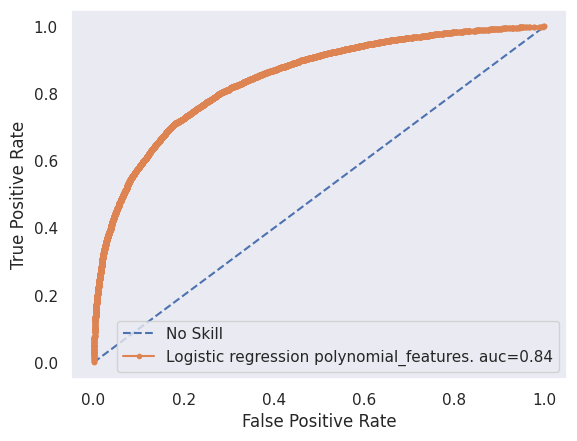

In [131]:
# Посчитаем основные метрики и сохраним для сравнения
fbeta = fbeta_score(y_test, y_preds_logreg_poly, beta=beta)

y_pred = pipeline_logreg_poly.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f'F1-score for Logistic regression polynomial_features (recall bias): {fbeta}')
print(f'AUC Logistic regression polynomial_features: {roc_auc}')
plot_roc_auc(fpr, tpr, thresholds, title=f'Logistic regression polynomial_features. auc={roc_auc:.2f}')

# metric_result['Logistic regression polynomial_features'] = {'fbeta': fbeta, 'auc': roc_auc}

Почему-то стало хуже. Возможно переобучились

##KNN

- MinMaxScaler - рекоммендованное масштабирование для KNN
- все категориальные признаки закодируем с помощью LeaveOneOutEncoder

In [133]:
categorical_preprocessing = Pipeline([
    ('Imputation', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('TargetEncoding', LeaveOneOutEncoder()),
])

normal_numeric = Pipeline([
     ('Imputation', SimpleImputer(strategy='mean')),
     ('Scaling', MinMaxScaler())
])

preprocessing = make_column_transformer(
     (normal_numeric, num_cols),
     (categorical_preprocessing, cat_cols)
)

In [134]:
pipeline_knn = Pipeline([
      ('Preprocessing', preprocessing),
      ("model", KNeighborsClassifier(n_neighbors=5, weights='distance'))
])

In [135]:
%%time

pipeline_knn.fit(X_train, y_train)

CPU times: user 456 ms, sys: 950 µs, total: 457 ms
Wall time: 460 ms


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday_Yes'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   LeaveOneOutEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object'))])),
                ('model', KNeighborsClassifier(weights='distance'))])

In [136]:
# Взглянем на все метрики
y_preds_knn = pipeline_knn.predict(X_test)
print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     27693
           1       0.68      0.50      0.58      7856

    accuracy                           0.84     35549
   macro avg       0.78      0.72      0.74     35549
weighted avg       0.83      0.84      0.83     35549



F1-score for KNN (recall bias): 0.5319291835692985
AUC KNN: 0.8334154914117641


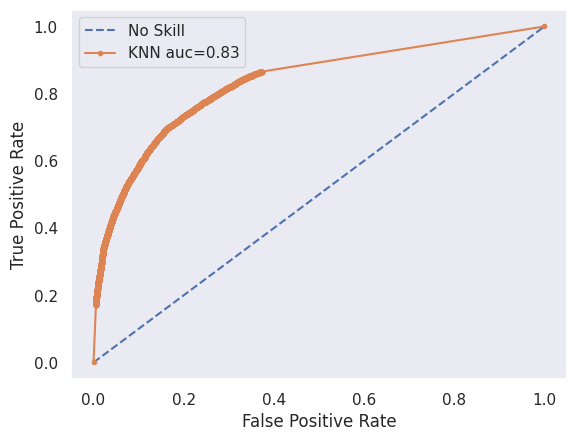

In [137]:
# Посчитаем основные метрики и сохраним для сравнения
fbeta = fbeta_score(y_test, y_preds_knn, beta=beta)

y_pred = pipeline_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f'F1-score for KNN (recall bias): {fbeta}')
print(f'AUC KNN: {roc_auc}')
plot_roc_auc(fpr, tpr, thresholds, title=f'KNN auc={roc_auc:.2f}')

metric_result['KNN'] = {'fbeta': fbeta, 'auc': roc_auc}

## Дерево решений

- преобразуем только категориальные признаки с помощью LeaveOneOutEncoder, OneHotEncoder не подходит для деревьев - только очен сильно раздуем размерность
- в числовых признаках только заполним пропуски, масштабирование для деревянных моделей не нужно

In [138]:
categorical_preprocessing = Pipeline([
    ('Imputation', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('TargetEncoding', LeaveOneOutEncoder()),
])

normal_numeric = Pipeline([
     ('Imputation', SimpleImputer(strategy='mean'))
])

preprocessing = make_column_transformer(
     (normal_numeric, num_cols),
     (categorical_preprocessing, cat_cols)
)

In [139]:
pipeline_tree = Pipeline([
      ('Preprocessing', preprocessing),
      ("model", DecisionTreeClassifier(min_samples_leaf=5, random_state=random_state, max_depth=100))
])

In [140]:
%%time

pipeline_tree.fit(X_train, y_train)

CPU times: user 2.47 s, sys: 16.6 ms, total: 2.49 s
Wall time: 2.48 s


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer())]),
                                                  Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday_Yes'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   LeaveOneOutEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(max_depth=100, min_samples_leaf=5,
                                        random_state=2024))])

In [141]:
# Взглянем на все метрики
y_preds_tree = pipeline_tree.predict(X_test)
print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     27693
           1       0.68      0.50      0.58      7856

    accuracy                           0.84     35549
   macro avg       0.78      0.72      0.74     35549
weighted avg       0.83      0.84      0.83     35549



F1-score for DecisionTree (recall bias): 0.3108928055475296
AUC DecisionTree: 0.6353210729799078


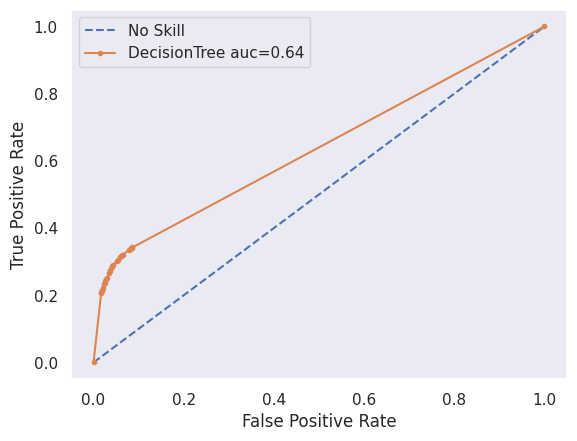

In [142]:
# Посчитаем основные метрики и сохраним для сравнения
fbeta = fbeta_score(y_test, y_preds_tree, beta=beta)

y_pred = pipeline_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f'F1-score for DecisionTree (recall bias): {fbeta}')
print(f'AUC DecisionTree: {roc_auc}')
plot_roc_auc(fpr, tpr, thresholds, title=f'DecisionTree auc={roc_auc:.2f}')

metric_result['DecisionTree'] = {'fbeta': fbeta, 'auc': roc_auc}

Визуализация дерева решений

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.198927 to fit


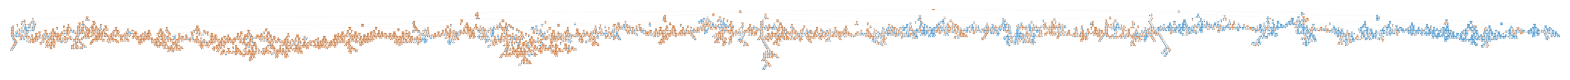

In [163]:
tree_model = pipeline_tree["model"]

dot_data = export_graphviz(
    tree_model,
    feature_names=pipeline_tree['Preprocessing'].get_feature_names_out(),
    class_names=tree_model.classes_.astype(str),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)

plt.figure(figsize=(20, 10))
plt.imshow(plt.imread("decision_tree.png"))
plt.axis('off')
plt.show()

Очень большое дерево, выведем только до глубины 4

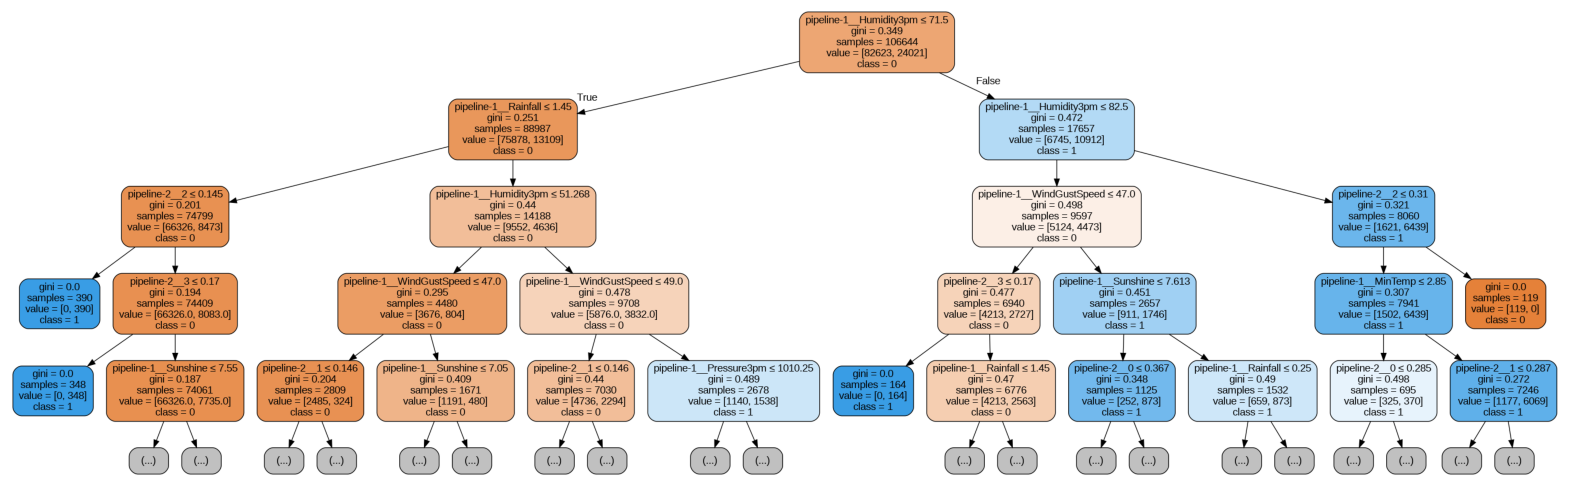

In [165]:
dot_data = export_graphviz(
    pipeline_tree["model"],
    feature_names=pipeline_tree['Preprocessing'].get_feature_names_out(),
    class_names=tree_model.classes_.astype(str),
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=4
)

graph = Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)

plt.figure(figsize=(20, 10))
plt.imshow(plt.imread("decision_tree.png"))
plt.axis('off')
plt.show()

Признаки, по которым дерево решений первоначально выбирает класс похожи на признаки с большими значениия коэффициентов при логистической регрессии

## Сравнение метрик

In [158]:
metric_result

{'DummyClassifier': {'fbeta': 0.0, 'auc': 0.5},
 'Logistic regression without reg': {'fbeta': 0.5349554767640133,
  'auc': 0.867849397338273},
 'Logistic regression L2': {'fbeta': 0.5348346235045742,
  'auc': 0.8679091152388536},
 'Logistic regression L1': {'fbeta': 0.5341093665403357,
  'auc': 0.8679070422113626},
 'KNN': {'fbeta': 0.5319291835692985, 'auc': 0.8334154914117641},
 'DecisionTree': {'fbeta': 0.3108928055475296, 'auc': 0.6353210729799078}}

Лучшая модель - Логистическая регрессия без регуляризации

#Задача 2. Предсказываем был ли дождь сегодня. Целевая переменная - RainToday
Был вариант рассмотреть эту задачу, но происходит утечка данных - RainToday всегда может быть предсказано по кол-ву миллиметров осадков. Точность модели и многие другие метрики будут очень хорошими :D Попробуем лучше решить задачу регрессии (см. Задача 3)

In [14]:
df = original_df.copy()
df = df.drop(columns='RainTomorrow')

Удалим строки, где целевая переменная NaN.

In [15]:
size_before = df.shape[0]
df = df.dropna(subset = ['RainToday'])
size_after = df.shape[0]
print(f"Удалили {(size_before - size_after) / size_before * 100:.2f}% данных")

Удалили 2.24% данных


In [16]:
df = fetch_df(df)


Посмотрим, как распределена целевая переменная

<Axes: ylabel='Frequency'>

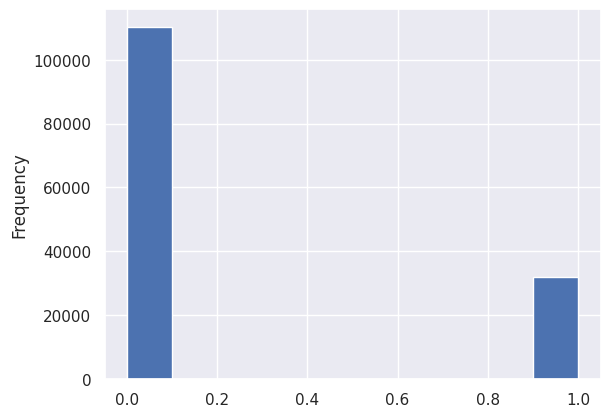

In [17]:
df['RainToday_Yes'].plot.hist()

Произведем разбиение со стратификацией

In [18]:
X, y = df.drop(columns='RainToday_Yes'), df['RainToday_Yes']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

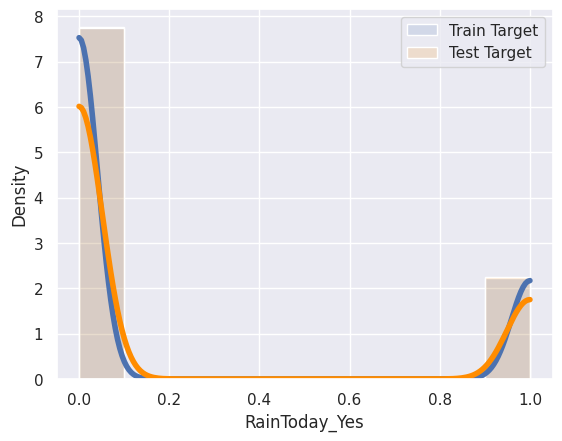

In [23]:
fold_visualizer(y_train, y_test)

In [24]:
num_cols = X_train.select_dtypes(exclude='object').columns
num_cols

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [25]:
num_cols_with_outliers = pd.Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed9am', \
                                   'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm'])
num_cols_with_outliers

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm'],
      dtype='object')

In [26]:
num_cols_with_normal = num_cols.difference(num_cols_with_outliers)
num_cols_with_normal

Index(['Date', 'MaxTemp', 'MinTemp', 'Pressure3pm', 'Pressure9am', 'Temp3pm',
       'Temp9am', 'WindGustSpeed'],
      dtype='object')

In [27]:
cat_cols = X_train.select_dtypes(include='object').columns
cat_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [33]:
categorical_preprocessing = Pipeline([
    ('Imputation', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('TargetEncoding', OneHotEncoder(drop='first')),
])

categorical_preprocessing_location = Pipeline([
    ('Imputation', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('TargetEncoding', LeaveOneOutEncoder()),
])

normal_numeric_preprocessing = Pipeline([
     ('Imputation', SimpleImputer(strategy='mean')),
     ('Scaling', StandardScaler())
])

outliers_numeric_preprocessing = Pipeline([
     ('Imputation', SimpleImputer(strategy='mean')),
     ('Scaling', RobustScaler())
])

preprocessing = make_column_transformer(
     (normal_numeric_preprocessing, num_cols_with_normal),
     (outliers_numeric_preprocessing, num_cols_with_outliers),
     (categorical_preprocessing, cat_cols_without_location),
     (categorical_preprocessing_location, pd.Index(['Location']))
)

In [34]:
pipeline_logreg = Pipeline([
      ('Preprocessing', preprocessing),
      ("model", LogisticRegression())
])

In [35]:
%%time

pipeline_logreg.fit(X_train, y_train)

CPU times: user 1.57 s, sys: 266 ms, total: 1.84 s
Wall time: 1.19 s


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['Date', 'MaxTemp', 'MinTemp', 'Pressure3pm', 'Pressure9am', 'Temp3pm',
       'Temp9am', 'WindGustSpeed'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   Robus...
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['WindDir3pm', 'WindDir9am', 'WindGustDir'], dtype='object')),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   LeaveOneOutEncoder())]),
                                                  Index(['Location'], dtype='object'))])),
                ('model', LogisticRegression())])

In [36]:
y_pred_logreg = pipeline_logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27534
           1       1.00      1.00      1.00      8016

    accuracy                           1.00     35550
   macro avg       1.00      1.00      1.00     35550
weighted avg       1.00      1.00      1.00     35550



F1-score for Logistic regression without reg (recall bias): 0.9999001971107063
AUC Logistic regression without reg: 0.9999999909384398


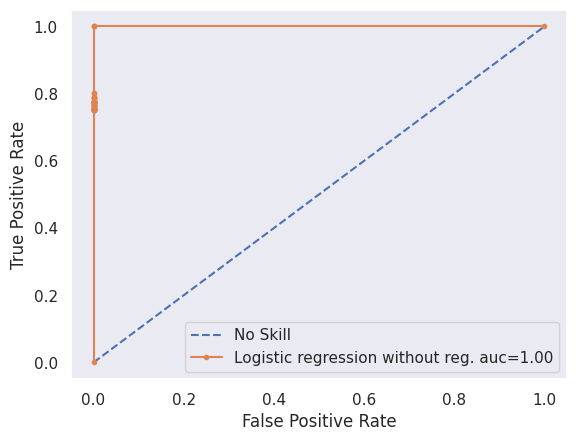

In [38]:
fbeta = fbeta_score(y_test, y_pred_logreg, beta=beta)

y_pred = pipeline_logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f'F1-score for Logistic regression without reg (recall bias): {fbeta}')
print(f'AUC Logistic regression without reg: {roc_auc}')
plot_roc_auc(fpr, tpr, thresholds, title=f'Logistic regression without reg. auc={roc_auc:.2f}')

#Задача 3. Предсказание количества осадков
Основная метрика - SMAPE, R2
Вспомогательные метрики - MAE, MSE


In [11]:
df = original_df.copy()
df = df.drop(columns='RainToday') #
df = df.drop(columns='RainTomorrow')

In [12]:
size_before = df.shape[0]
df = df.dropna(subset = ['Rainfall'])
size_after = df.shape[0]
print(f"Удалили {(size_before - size_after) / size_before * 100:.2f}% данных")

Удалили 2.24% данных


In [13]:
df = fetch_df(df)

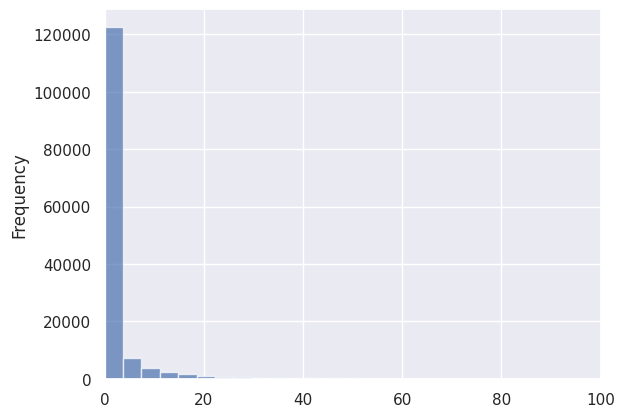

In [14]:
df['Rainfall'].plot.hist(bins=100, alpha=0.7)
plt.xlim(left=0, right=100)
plt.show()

In [18]:
X, y = df.drop(columns='Rainfall'), df['Rainfall']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

In [92]:
def fold_visualizer(y_train, y_test, bins=100):
    fig, ax = plt.subplots()
    sns.histplot(
        data=y_train,
        kde=True,
        stat="density",
        alpha=0.15,
        label="Train Target",
        bins=bins,
        line_kws={"linewidth":4},
    )
    sns.histplot(
        data=y_test,
        kde=True,
        stat="density",
        color="darkorange",
        alpha=0.15,
        label="Test Target",
        bins=bins,
        line_kws={"linewidth":4},
    )
    plt.xlim(left=0, right=100)
    ax.legend()
    plt.show()

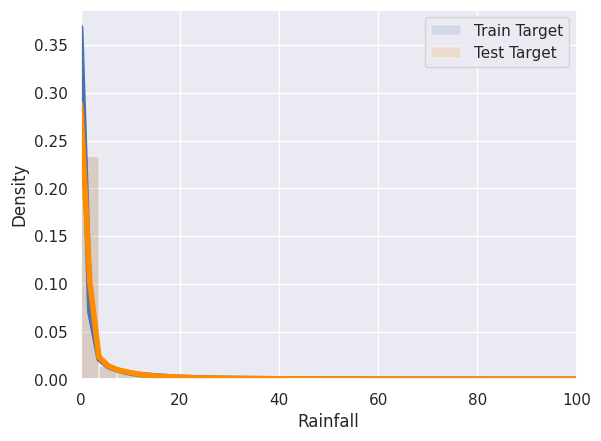

In [93]:
fold_visualizer(y_train, y_test)

In [20]:
num_cols = X_train.select_dtypes(exclude='object').columns
num_cols

Index(['Date', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [21]:
num_cols_with_outliers = pd.Index(['Evaporation', 'Sunshine', 'WindSpeed9am', \
                                   'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm'])
num_cols_with_outliers

Index(['Evaporation', 'Sunshine', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm'],
      dtype='object')

In [22]:
num_cols_with_normal = num_cols.difference(num_cols_with_outliers)
num_cols_with_normal

Index(['Date', 'MaxTemp', 'MinTemp', 'Pressure3pm', 'Pressure9am', 'Temp3pm',
       'Temp9am', 'WindGustSpeed'],
      dtype='object')

In [23]:
cat_cols = X_train.select_dtypes(include='object').columns
cat_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [24]:
cat_cols_without_location = cat_cols.difference( pd.Index(['Location']))
cat_cols_without_location

Index(['WindDir3pm', 'WindDir9am', 'WindGustDir'], dtype='object')

## Константное предсказание (DummyRegressor)

In [125]:
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, y_train)
dummy_reg_y_pred = dummy_reg.predict(X_test)

In [30]:
def standard_smape(actual, forecast):
    return np.mean(np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast))) * 100

In [127]:
print(f"SMAPE: {standard_smape(y_test, dummy_reg_y_pred)}")
print(f"r2_score: {r2_score(y_test, dummy_reg_y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, dummy_reg_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, dummy_reg_y_pred)}")

SMAPE: 83.01012125856656
r2_score: -3.0479785025461226e-05
MAE: 3.6385650968114596
MSE: 76.92975227483178


## Линейная регрессия

Воспользуемся таким же pipeline'ом как и в логистической регрессии

In [43]:
categorical_preprocessing = Pipeline([
    ('Imputation', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('TargetEncoding', OneHotEncoder(drop='first')),
])

categorical_preprocessing_location = Pipeline([
    ('Imputation', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('TargetEncoding', LeaveOneOutEncoder()),
])

normal_numeric_preprocessing = Pipeline([
     ('Imputation', SimpleImputer(strategy='mean')),
     ('Scaling', StandardScaler())
])

outliers_numeric_preprocessing = Pipeline([
     ('Imputation', SimpleImputer(strategy='mean')),
     ('Scaling', RobustScaler())
])

preprocessing = make_column_transformer(
     (normal_numeric_preprocessing, num_cols_with_normal),
     (outliers_numeric_preprocessing, num_cols_with_outliers),
     (categorical_preprocessing, cat_cols_without_location),
     (categorical_preprocessing_location, pd.Index(['Location']))
)

### Без регуляризации

In [44]:
pipeline_linreg = Pipeline([
      ('Preprocessing', preprocessing),
      ("model", LinearRegression())
])

In [46]:
%%time

pipeline_linreg.fit(X_train, y_train)

CPU times: user 1.26 s, sys: 211 ms, total: 1.47 s
Wall time: 1.15 s


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['Date', 'MaxTemp', 'MinTemp', 'Pressure3pm', 'Pressure9am', 'Temp3pm',
       'Temp9am', 'WindGustSpeed'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   Robus...
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['WindDir3pm', 'WindDir9am', 'WindGustDir'], dtype='object')),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   LeaveOneOutEncoder())]),
                                                  Index(['Location'], dtype='object'))])),
                ('model', LinearRegression())])

In [47]:
linreg_y_pred = pipeline_linreg.predict(X_test)

In [48]:
print(f"SMAPE: {standard_smape(y_test, linreg_y_pred)}")
print(f"r2_score: {r2_score(y_test, linreg_y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, linreg_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, linreg_y_pred)}")

SMAPE: 82.72567027747553
r2_score: 0.1311901792393131
MAE: 3.5310482884094347
MSE: 66.8352871598759


График истинных и предсказанных значений

In [50]:
def plot_actual_vs_predicted(y_test, y_pred):
  plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label='Идеал')
  plt.xlabel('Истинные значения')
  plt.ylabel('Предсказанные значения')
  plt.title('Истинные vs Предсказанные значения')
  plt.legend()
  plt.grid(True)
  plt.show()

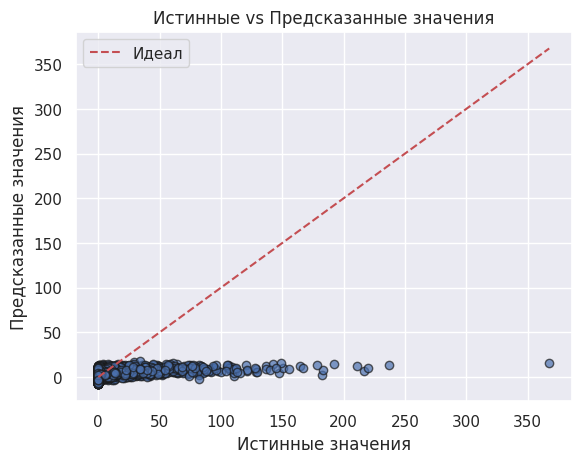

In [51]:
plot_actual_vs_predicted(y_test, linreg_y_pred)

Видно, что модель плохо подстраивается под выбросы

### L2-регуляризация

In [52]:
pipeline_ridge = Pipeline([
      ('Preprocessing', preprocessing),
      ("model", Ridge(alpha=1.0))
])

In [53]:
%%time

pipeline_ridge.fit(X_train, y_train)

CPU times: user 565 ms, sys: 202 ms, total: 768 ms
Wall time: 730 ms


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['Date', 'MaxTemp', 'MinTemp', 'Pressure3pm', 'Pressure9am', 'Temp3pm',
       'Temp9am', 'WindGustSpeed'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   Robus...
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['WindDir3pm', 'WindDir9am', 'WindGustDir'], dtype='object')),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   LeaveOneOutEncoder())]),
                                                  Index(['Location'], dtype='object'))])),
                ('model', Ridge())])

In [54]:
ridge_y_pred = pipeline_ridge.predict(X_test)

In [55]:
print(f"SMAPE: {standard_smape(y_test, ridge_y_pred)}")
print(f"r2_score: {r2_score(y_test, ridge_y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, ridge_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, ridge_y_pred)}")

SMAPE: 82.72547507874324
r2_score: 0.1311918909209806
MAE: 3.531000038895738
MSE: 66.83515548464268


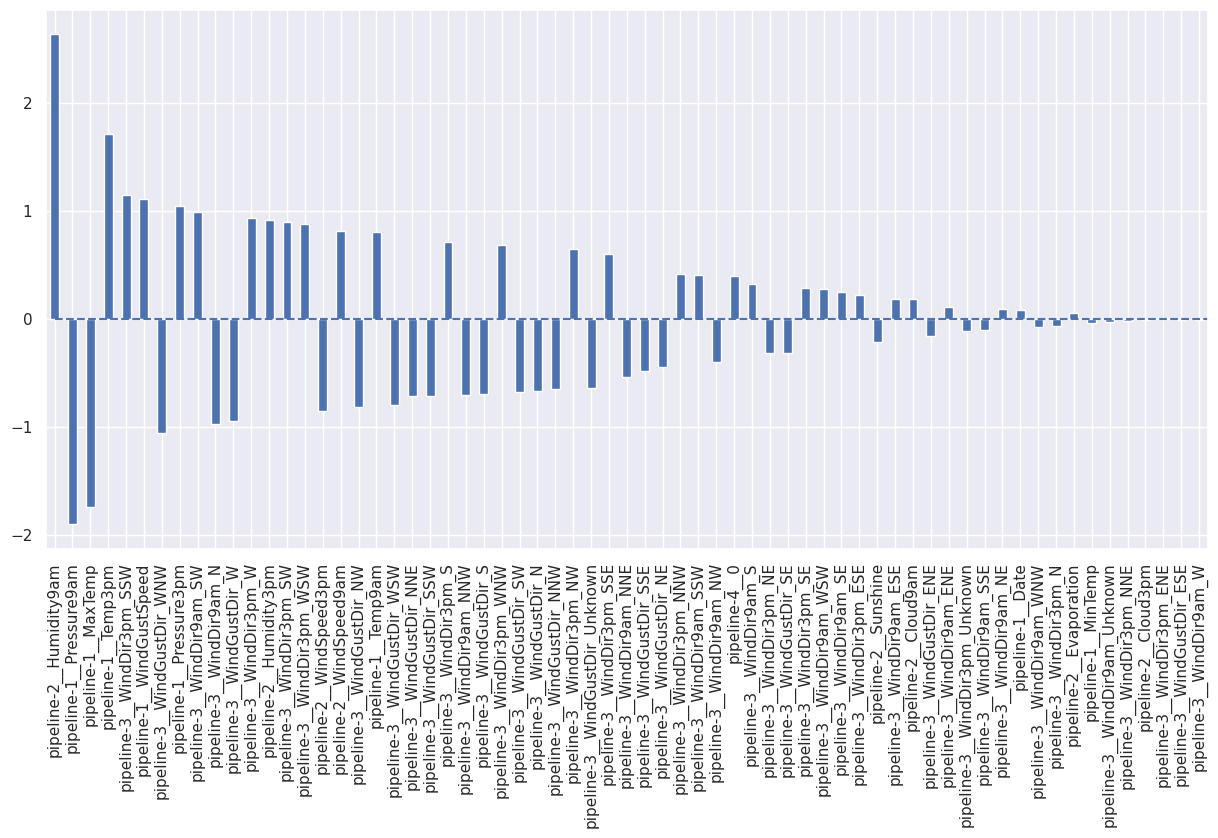

In [59]:
plotCoefficients(pipeline_ridge['model'], pipeline_ridge['Preprocessing'].get_feature_names_out())

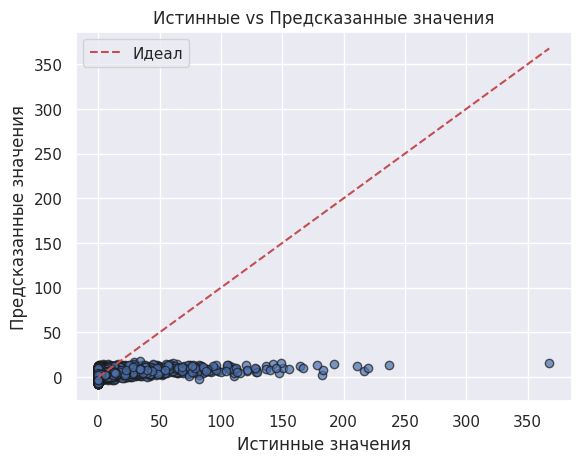

In [60]:
plot_actual_vs_predicted(y_test, ridge_y_pred)

### Полиномизация

In [61]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

pipeline_ridge_poly = Pipeline([
      ('Preprocessing', preprocessing),
      ("polynomial_features", polynomial_features),
      ("model", Ridge(alpha=1.0))
])

In [62]:
%%time

pipeline_ridge_poly.fit(X_train, y_train)

CPU times: user 36.7 s, sys: 5.15 s, total: 41.8 s
Wall time: 28.1 s


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  Index(['Date', 'MaxTemp', 'MinTemp', 'Pressure3pm', 'Pressure9am', 'Temp3pm',
       'Temp9am', 'WindGustSpeed'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   Robus...
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['WindDir3pm', 'WindDir9am', 'WindGustDir'], dtype='object')),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   LeaveOneOutEncoder())]),
                                                  Index(['Location'], dtype='object'))])),
                ('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('model', Ridge())])

In [63]:
ridge_poly_y_pred = pipeline_ridge_poly.predict(X_test)

In [64]:
print(f"SMAPE: {standard_smape(y_test, ridge_y_pred)}")
print(f"r2_score: {r2_score(y_test, ridge_y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, ridge_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, ridge_y_pred)}")

SMAPE: 82.72547507874324
r2_score: 0.1311918909209806
MAE: 3.531000038895738
MSE: 66.83515548464268


## Дерево решений

In [65]:
categorical_preprocessing = Pipeline([
    ('Imputation', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('TargetEncoding', LeaveOneOutEncoder()),
])

normal_numeric = Pipeline([
     ('Imputation', SimpleImputer(strategy='mean'))
])

preprocessing = make_column_transformer(
     (normal_numeric, num_cols),
     (categorical_preprocessing, cat_cols)
)

In [71]:
pipeline_tree_reg = Pipeline([
      ('Preprocessing', preprocessing),
      ("model", DecisionTreeRegressor(min_samples_leaf=4, random_state=random_state, max_depth=200))
])

In [72]:
%%time

pipeline_tree_reg.fit(X_train, y_train)

CPU times: user 3.8 s, sys: 22.2 ms, total: 3.82 s
Wall time: 3.98 s


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer())]),
                                                  Index(['Date', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('TargetEncoding',
                                                                   LeaveOneOutEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object'))])),
                ('model',
                 DecisionTreeRegressor(max_depth=200, min_samples_leaf=4,
                                       random_state=2024))])

In [73]:
tree_reg_y_pred = pipeline_tree_reg.predict(X_test)

In [74]:
print(f"SMAPE: {standard_smape(y_test, tree_reg_y_pred)}")
print(f"r2_score: {r2_score(y_test, tree_reg_y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, tree_reg_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, tree_reg_y_pred)}")

SMAPE: 81.34140220391829
r2_score: -0.024903809247662112
MAE: 3.315393342709798
MSE: 78.84319302737991


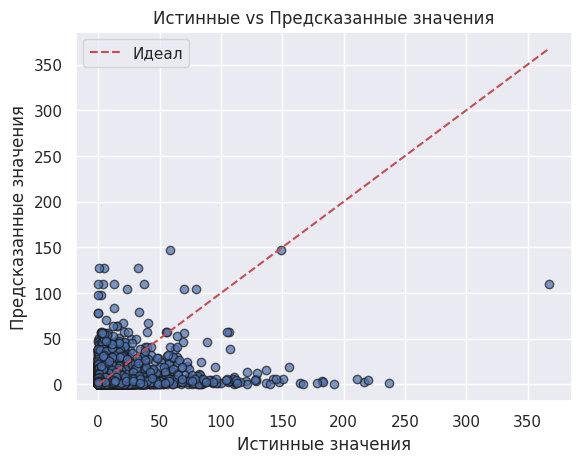

In [75]:
plot_actual_vs_predicted(y_test, tree_reg_y_pred)

## Сравнение полученных метрик

Скорее всего, это не очень удачная задача по этому датасету. Основная задача для этого датасета - это предсказание дождя на завтра

Тем не менее, лучша модель по метрике SMAPE, прогнозирующая количество осадков - дерево решений. По r2 - линейная регрессия с L2 рег-ей